In [1]:
import numpy as np
import pickle
import pandas as pd
import statistics
from statistics import mean
from scipy import stats
from biosppy.signals import ecg, eda, emg, resp
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cmath
import matplotlib.pyplot as plt
import os
from scipy.fft import fft2, fftshift, fft
from scipy import signal
import math
import seaborn
import librosa
import pyapril
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [156]:
df=pd.read_pickle('D:/feat/Dataset/feat_dat_main.pkl')

,Person,Repetition,Activity,length,max,min,mean,std
0,38,3,1,1.000000,"[396.0, 431.0, 441.0, 432.0, 391.0, 381.0, 430...","[371.0, 374.0, 428.0, 384.0, 361.0, 362.0, 379...","[380.9183673469388, 406.98979591836735, 434.26...","[8.463213879560099, 19.129256841427207, 3.4627..."
1,39,1,1,1.000000,"[409.0, 424.0, 425.0, 428.0, 417.0, 388.0, 378...","[375.0, 408.0, 416.0, 415.0, 387.0, 367.0, 368...","[389.2142857142857, 416.5408163265306, 421.673...","[7.61208759480738, 3.3720591642319064, 2.36805..."
2,39,2,1,1.000000,"[386.0, 420.0, 433.0, 432.0, 424.0, 395.0, 378...","[370.0, 375.0, 418.0, 421.0, 387.0, 367.0, 367...","[379.53061224489795, 408.3061224489796, 427.26...","[3.9928611848501214, 13.867748638893657, 3.274..."
3,39,3,1,1.000000,"[386.0, 424.0, 435.0, 430.0, 418.0, 393.0, 376...","[375.0, 386.0, 424.0, 418.0, 393.0, 368.0, 370...","[381.6734693877551, 412.0612244897959, 429.775...","[2.9199367836464307, 10.430348504685554, 2.815..."
4,40,1,1,1.000000,"[397.0, 390.0, 421.0, 437.0, 435.0, 426.0, 396...","[380.0, 373.0, 380.0, 421.0, 421.0, 390.0, 360...","[388.09183673469386, 382.9795918367347, 407.79...","[5.764222401305469, 3.888705759820865, 9.89636..."
...,...,...,...,...,...,...,...,...
1749,37,3,1,0.902141,"[410.0, 409.0, 419.0, 418.0, 415.0, 413.0, 411...","[395.0, 404.0, 410.0, 411.0, 409.0, 404.0, 390...","[402.96938775510205, 405.9795918367347, 414.24...","[3.8477506857178128, 1.4212641099167467, 2.892..."
1750,38,1,1,0.909276,"[406.0, 411.0, 410.0, 413.0, 416.0, 417.0, 412...","[396.0, 403.0, 404.0, 405.0, 404.0, 406.0, 395...","[399.88775510204084, 406.57142857142856, 405.9...","[2.9584974573812146, 2.6764277135993138, 1.862..."
1751,38,2,1,0.848114,"[405.0, 405.0, 413.0, 412.0, 414.0, 414.0, 415...","[396.0, 400.0, 404.0, 405.0, 406.0, 405.0, 405...","[399.61224489795916, 402.7755102040816, 407.29...","[2.5818544713932967, 1.898068901810028, 3.0878..."
1752,38,3,1,0.846075,"[405.0, 409.0, 415.0, 417.0, 416.0, 411.0, 409...","[396.0, 403.0, 405.0, 408.0, 409.0, 395.0, 390...","[401.1326530612245, 405.7448979591837, 409.010...","[3.483599344045978, 1.8752481440685576, 2.8873..."


In [174]:
df=pd.read_csv('D:/feat/Dataset/dat_feat_fmcc_4_s.csv')

,person2,rep2,label2,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_1991,feat_1992,feat_1993,feat_1994,feat_1995,feat_1996,feat_1997,feat_1998,feat_1999,feat_2000
0,1,1,1,24.745137,20.120851,0.730041,0.213505,0.202732,24.706993,19.940776,...,24.978170,20.429707,1.361029,0.197575,0.555433,25.005248,20.257024,1.217554,0.350675,0.365119
1,1,2,1,24.667327,19.951346,0.763933,-0.033601,0.636076,24.686660,20.315470,...,24.974108,19.446105,0.458492,-0.193830,0.632707,24.968432,19.674214,0.683452,-0.189412,0.559091
2,1,3,1,24.212543,20.376216,1.093642,0.438287,0.792131,24.233201,20.318341,...,24.232865,19.391142,0.841717,0.758812,0.708061,24.217128,19.875713,1.137769,0.376607,0.291609
3,2,1,1,24.458104,19.956823,0.578962,0.551052,0.975613,24.498235,20.284926,...,24.580750,19.960979,0.739901,0.537919,0.868819,24.552567,19.836698,0.815638,0.713876,1.002804
4,2,2,1,24.204549,19.493803,0.895303,0.243636,0.148885,24.337671,20.079924,...,24.334197,19.585872,0.743423,0.158125,0.590551,24.222611,19.554537,0.819798,0.362746,0.737749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,71,2,6,24.047902,18.534514,2.119319,0.453599,1.024332,24.140489,18.509086,...,23.731904,17.509183,2.295552,0.107691,0.353217,23.703185,17.471772,2.198673,-0.006599,0.658373
1750,71,3,6,24.313093,18.999985,3.304139,0.811547,0.164425,24.312137,18.782172,...,23.665043,17.351740,2.719854,0.737964,0.031137,23.727690,17.504450,2.610553,0.452083,0.469771
1751,72,1,6,23.716493,14.678350,4.814474,-0.844939,-0.418093,23.963108,14.557400,...,24.139224,13.921884,4.977186,0.073606,-0.260300,23.920585,14.183777,4.922291,-0.153454,-0.363568
1752,72,2,6,24.186960,16.669007,2.598004,-0.286496,0.633055,24.233447,16.858509,...,24.214430,16.682683,3.012591,-0.216963,0.418731,24.137412,16.530193,2.836326,-0.188587,0.489912


In [175]:
def process(activity, df, capt, fmcc, irr):
    if capt==1:
        #Only select rows with this activity
        if irr==1:
            if fmcc==0:
                df= df.loc[df['Activity']==str(activity)]
            else:
                df= df.loc[df['label2']==int(activity)]
            df=df.reset_index()
            features=df.drop(columns=[df.columns[0], df.columns[1], df.columns[2], df.columns[3], df.columns[4]])
        features=df.drop(columns=[df.columns[0], df.columns[1], df.columns[2], df.columns[3]])
    else:
        features=df.drop(columns=[df.columns[0], df.columns[1], df.columns[2]])

    if fmcc==0:
        #Features
        featur=np.zeros((len(df), len(df['max'][0])*4+1))
        for i in range(len(df)):
            featur[i]=np.concatenate((features['max'][i], features['min'][i], features['mean'][i], features['std'][i], features['length'][i]), axis=None)

        #Train test split
        if irr==0 or capt==0:
            xtrain, xtest, ytrain, ytest = train_test_split(featur,df['Activity'], test_size=0.30, random_state=101)
        else:
            xtrain, xtest, ytrain, ytest = train_test_split(featur,df['Irregularity'], test_size=0.30, random_state=101) 
    else:
        #Train test split
        if irr==0 or capt==0:
            xtrain, xtest, ytrain, ytest = train_test_split(features,df['label2'], test_size=0.30, random_state=101)
        else:
            xtrain, xtest, ytrain, ytest = train_test_split(features,df['irr2'], test_size=0.2, random_state=101)

    #If sitting down or standing up, only normal vs irregular (in capt dataset)
    if int(activity) !=1 and capt==1 and irr==1:
        ytrainG=ytrain
        ytestG=ytest
        ytrain = np.array([1 if i in ['0'] else 2 for i in ytrainG])
        ytest = np.array([1 if i in ['0'] else 2 for i in ytestG])
        
    return xtrain, ytrain, xtest, ytest

In [176]:
capt=0 #captured dataset?
irr=1 #0 to classify between walking, standing up or sitting down. 1 to classify between irregularities
activity=1 #If capt, choose activity in which to classify irregularities
fmcc=1 #1 if fmcc, 0 if main line

xtrain, ytrain, xtest, ytest= process(activity, df, capt, fmcc, irr)

918     3
516     2
968     4
778     3
209     1
       ..
599     2
1599    6
1361    5
1547    5
863     3
Name: label2, Length: 1227, dtype: int64

# Create models

In [159]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000000, C=1)
logmodel.fit(xtrain,ytrain)
y_pred = logmodel.predict(xtest)
y_predtrain=logmodel.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, y_pred))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\sebba\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-159-610a3dfe0201>", line 4, in <module>
    logmodel.fit(xtrain,ytrain)
  File "C:\Users\sebba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\sebba\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\sebba\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\sebba\anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\sebba\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    resu

TypeError: object of type 'NoneType' has no len()

In [177]:
k=1
neigh=KNeighborsClassifier(n_neighbors=k)
neigh.fit(xtrain, ytrain)
ypred=neigh.predict(xtest)
y_predtrain=neigh.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 1.0
Test: 0.8975332068311196


In [152]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)
clf.fit(xtrain, ytrain)
ypred=clf.predict(xtest)
y_predtrain=clf.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

Train: 1.0
Test: 0.6641366223908919


In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
boost=AdaBoostClassifier(n_estimators=100)
boost.fit(xtrain,ytrain)
ypred=boost.predict(xtest)
y_predtrain=boost.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

In [ ]:
#SVM
from sklearn.svm import SVC
clf=SVC()
clf.fit(xtrain,ytrain)
ypred=clf.predict(xtest)
y_predtrain=clf.predict(xtrain)
print("Train:",accuracy_score(ytrain, y_predtrain))
print("Test:",accuracy_score(ytest, ypred))

# Hyperparameter testing

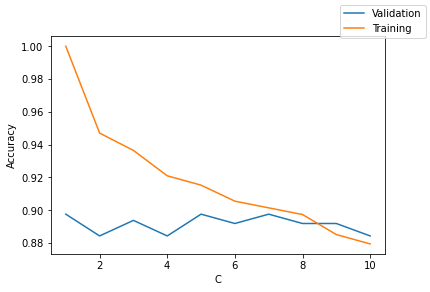

In [169]:
c=([1, 2, 3, 4, 5, 6,7,8,9,10])
acc_t=np.zeros(len(c))
acc=np.zeros(len(c))
for i in range(len(c)):
    model=KNeighborsClassifier(n_neighbors=c[i])
    model.fit(xtrain, ytrain)
    y_v=model.predict(xtest)
    acc[i]=accuracy_score(ytest, y_v)
    acc_t[i]=accuracy_score(ytrain, model.predict(xtrain))
fig, ax1 = plt.subplots()
plt.plot(c, acc)
ax1.set_xlabel('C')
ax1.set_ylabel('Accuracy')
plt.plot(c, acc_t)
fig.legend(["Validation", "Training"])

# Confusion matrix

In [179]:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
         print("Confusion matrix, without normalization")
 
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label") 

Normalized confusion matrix


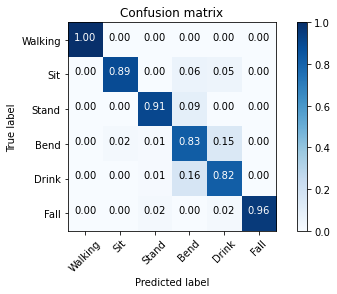

In [180]:
y_pred = neigh.predict(xtest)
matrix = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(matrix, ["Walking", "Sit", "Stand", "Bend", "Drink", "Fall"], normalize=True)